In [1]:
# Import necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set floating point precision option for pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import seaborn library and set context and style
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Import warnings and set filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import time library
from time import time

# Import matplotlib ticker and scipy stats
import matplotlib.ticker as tkr
from scipy import stats

# Import statistical tools for time series analysis
from statsmodels.tsa.stattools import adfuller

# Import preprocessing from sklearn
from sklearn import preprocessing

# Import partial autocorrelation function from statsmodels
from statsmodels.tsa.stattools import pacf

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [2]:
data = pd.read_csv('powerconsumption.csv')

In [3]:
# Print the number of rows and columns in the data
print('Number of rows and columns:', data.shape)

# Display the first 5 rows of the data
data.head(5)

Number of rows and columns: (52416, 9)


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.5590,73.8000,0.0830,0.0510,0.1190,34055.6962,16128.8754,20240.9639
1,1/1/2017 0:10,6.4140,74.5000,0.0830,0.0700,0.0850,29814.6835,19375.0760,20131.0843
2,1/1/2017 0:20,6.3130,74.5000,0.0800,0.0620,0.1000,29128.1013,19006.6869,19668.4337
3,1/1/2017 0:30,6.1210,75.0000,0.0830,0.0910,0.0960,28228.8608,18361.0942,18899.2771
4,1/1/2017 0:40,5.9210,75.7000,0.0810,0.0480,0.0850,27335.6962,17872.3404,18442.4096


In [4]:
data.tail(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.0100,72.4000,0.0800,0.0400,0.0960,31160.4563,26857.3182,14780.3121
52412,12/30/2017 23:20,6.9470,72.6000,0.0820,0.0510,0.0930,30430.4182,26124.5781,14428.8115
52413,12/30/2017 23:30,6.9000,72.8000,0.0860,0.0840,0.0740,29590.8745,25277.6925,13806.4826
52414,12/30/2017 23:40,6.7580,73.0000,0.0800,0.0660,0.0890,28958.1749,24692.2369,13512.6050
52415,12/30/2017 23:50,6.5800,74.1000,0.0810,0.0620,0.1110,28349.8099,24055.2317,13345.4982


In [5]:
# Get the information about the dataframe
print("\nInformation about the dataframe:")
print(data.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None


In [6]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [7]:
print("\nData type of each column in the dataframe:")
print(data.dtypes)


Data type of each column in the dataframe:
Datetime                  datetime64[ns]
Temperature                      float64
Humidity                         float64
WindSpeed                        float64
GeneralDiffuseFlows              float64
DiffuseFlows                     float64
PowerConsumption_Zone1           float64
PowerConsumption_Zone2           float64
PowerConsumption_Zone3           float64
dtype: object


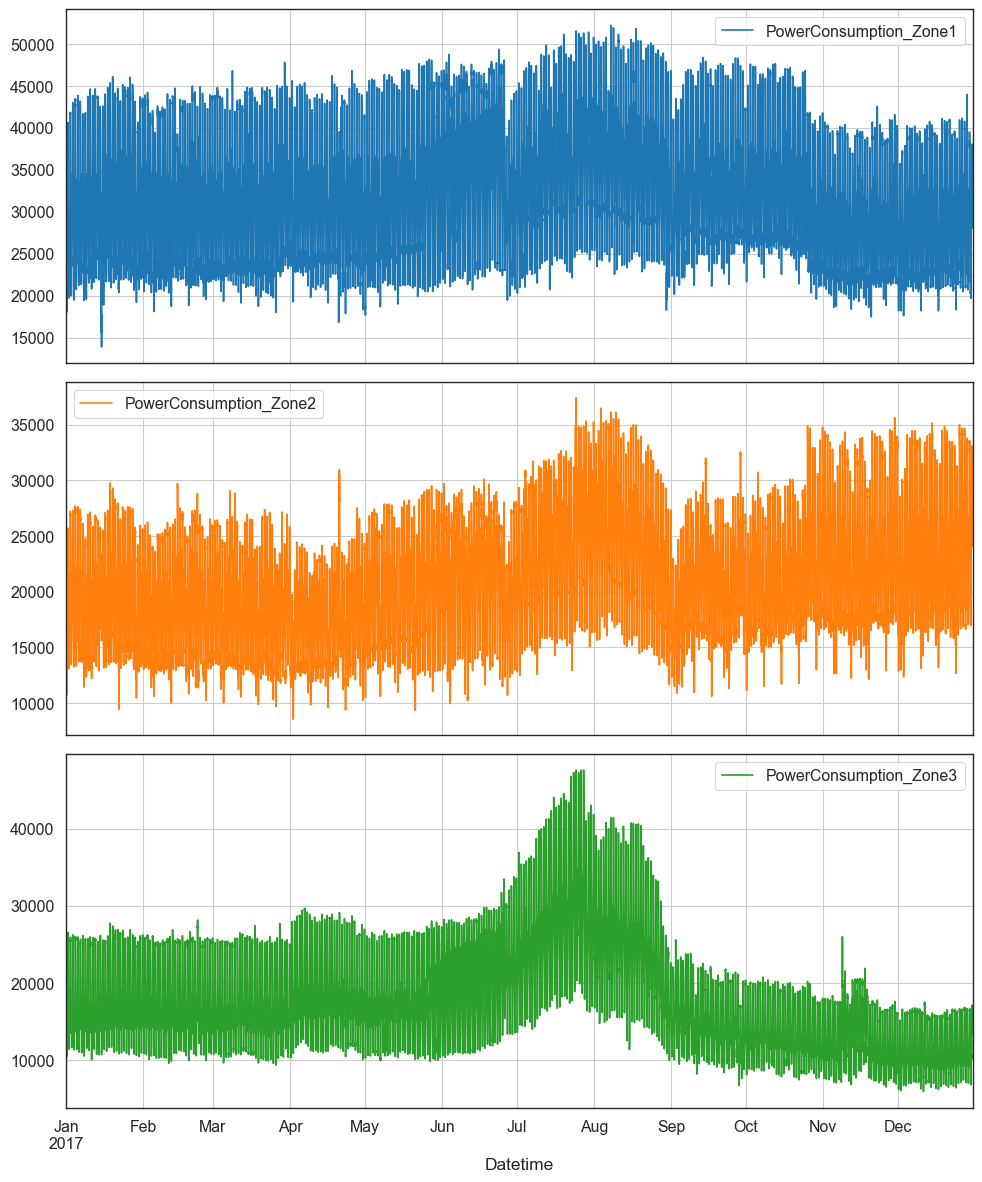

In [8]:
data = pd.read_csv('powerconsumption.csv', parse_dates=['Datetime'])
data.plot(x='Datetime', y=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], 
          subplots=True, figsize=(10, 12), grid=True)
plt.tight_layout()
plt.show()

In [9]:
# Extract time-based features
data['Hour'] = data['Datetime'].dt.hour
data['DayOfWeek'] = data['Datetime'].dt.dayofweek
data['Month'] = data['Datetime'].dt.month

# Final features: [Temperature, Humidity, Windspeed, ... , TotalPower, Hour, DayOfWeek, Month]
data['TotalPowerConsumption'] = data[['PowerConsumption_Zone1', 
                                  'PowerConsumption_Zone2', 
                                  'PowerConsumption_Zone3']].sum(axis=1)
data['TotalPowerConsumption'] = pd.to_numeric(data['TotalPowerConsumption'], errors='coerce')
# Drop the original zone columns (optional)
data = data.drop(['PowerConsumption_Zone1', 
              'PowerConsumption_Zone2', 
              'PowerConsumption_Zone3'], axis=1)
data.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Hour,DayOfWeek,Month,TotalPowerConsumption
0,2017-01-01 00:00:00,6.5590,73.8000,0.0830,0.0510,0.1190,0,6,1,70425.5354
1,2017-01-01 00:10:00,6.4140,74.5000,0.0830,0.0700,0.0850,0,6,1,69320.8439
2,2017-01-01 00:20:00,6.3130,74.5000,0.0800,0.0620,0.1000,0,6,1,67803.2219
3,2017-01-01 00:30:00,6.1210,75.0000,0.0830,0.0910,0.0960,0,6,1,65489.2321
4,2017-01-01 00:40:00,5.9210,75.7000,0.0810,0.0480,0.0850,0,6,1,63650.4463


In [10]:
# Time-based split (NO RANDOM SHUFFLING)
train_size = int(len(data)*0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Scale features (fit on training only)
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train.drop('Datetime', axis=1))
scaled_test = scaler.transform(test.drop('Datetime', axis=1))

In [11]:
def create_lookback(dataset, lookback=1):
    X, y = [], []
    for i in range(lookback, len(dataset)):
        X.append(dataset[i-lookback:i])   # Lookback window
        y.append(dataset[i, power_index])  # Next value
    return np.array(X), np.array(y)

# Power column index (assuming last column is TotalPower)
power_index = -1  

# Lookback = e.g., 24 hours (6 samples/hour * 24 = 144)
lookback = 144

X_train, y_train = create_lookback(scaled_train, lookback)
X_test, y_test = create_lookback(scaled_test, lookback)

In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (41788, 144, 9)
y_train shape: (41788,)


In [13]:
import tensorflow as tf
def regression_accuracy(y_true, y_pred):
    # Calculate percentage of predictions within 10% of true value
    tolerance = 0.10
    diff = tf.abs(y_true - y_pred)
    correct = tf.less_equal(diff, tolerance * tf.abs(y_true))
    return tf.reduce_mean(tf.cast(correct, tf.float32))


model = Sequential()
model.add(LSTM(64, input_shape=(lookback, X_train.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', regression_accuracy])
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=1240,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=8)],
    verbose=1,
    shuffle=False
)

model.summary()

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - loss: 0.0289 - mae: 0.1356 - regression_accuracy: 0.0955 - val_loss: 0.0099 - val_mae: 0.0825 - val_regression_accuracy: 0.0846
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - loss: 0.0073 - mae: 0.0658 - regression_accuracy: 0.1088 - val_loss: 0.0147 - val_mae: 0.1091 - val_regression_accuracy: 0.0771
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - loss: 0.0055 - mae: 0.0564 - regression_accuracy: 0.1164 - val_loss: 0.0142 - val_mae: 0.1081 - val_regression_accuracy: 0.0717
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - loss: 0.0053 - mae: 0.0580 - regression_accuracy: 0.1113 - val_loss: 0.0113 - val_mae: 0.0948 - val_regression_accuracy: 0.0681
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - loss: 0.0077 - mae: 0.0710 - regression_accuracy: 0.1093 - val_loss: 0.0086 - val_mae: 0.0803 - val_regression_accuracy: 0.0714
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - loss: 0.0103 - mae: 0.0829 - regress

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,173 (246.77 KB)

 Trainable params: 21,057 (82.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,116 (164.52 KB)

In [15]:
train_pred_scaled = model.predict(X_train)
test_pred_scaled = model.predict(X_test)

scaler_power = MinMaxScaler()
scaler_power.fit(data[['TotalPowerConsumption']])  # Fit on original full data

# Inverse transform predictions
train_pred = scaler_power.inverse_transform(train_pred_scaled)
test_pred = scaler_power.inverse_transform(test_pred_scaled)

# Get actual values in original scale
train_actual = scaler_power.inverse_transform(y_train.reshape(-1, 1))
test_actual = scaler_power.inverse_transform(y_test.reshape(-1, 1))

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


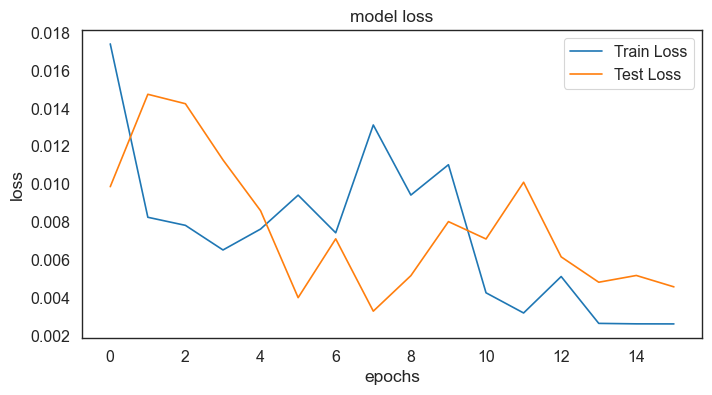

In [16]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [17]:
# Calculate mean absolute errors
train_mae = mean_absolute_error(train_actual, train_pred)
test_mae = mean_absolute_error(test_actual, test_pred)

print(f"Train MAE: {train_mae:.2f} kW")
print(f"Test MAE: {test_mae:.2f} kW")

# Calculate relative error percentages
train_range = train_actual.max() - train_actual.min()
test_range = test_actual.max() - test_actual.min()

print(f"\nTrain MAE Relative: {100*train_mae/train_range:.2f}% of data range")
print(f"Test MAE Relative: {100*test_mae/test_range:.2f}% of data range")

Train MAE: 7376.13 kW
Test MAE: 5631.43 kW

Train MAE Relative: 7.57% of data range
Test MAE Relative: 8.95% of data range


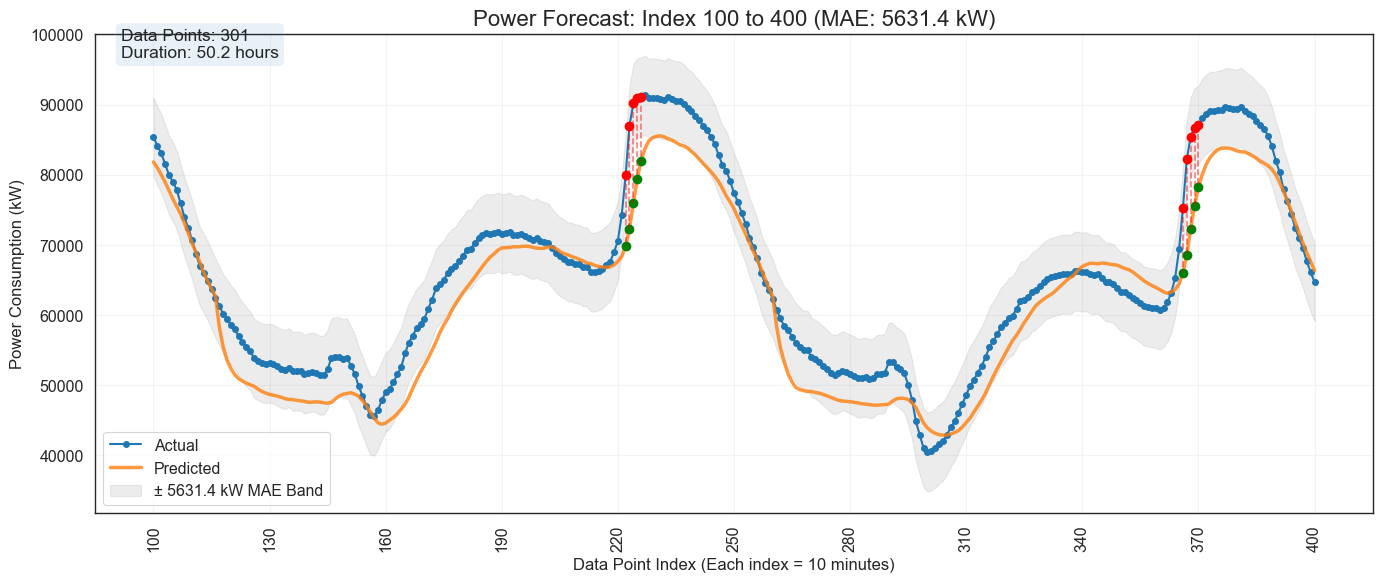

In [22]:
# Define your start and end indices
start_idx = 100   # Start index in the test set
end_idx = 400     # End index in the test set

plt.figure(figsize=(14, 6))

# Plot actual and predicted values (index-based)
plt.plot(range(start_idx, end_idx+1), 
         test_actual[start_idx:end_idx+1], 
         label='Actual', 
         color='#1f77b4',
         marker='o', 
         markersize=4, 
         linewidth=1.5)

plt.plot(range(start_idx, end_idx+1), 
         test_pred[start_idx:end_idx+1], 
         label='Predicted', 
         color='#ff7f0e', 
         linewidth=2.5,
         alpha=0.8)

# Add MAE indicators
plt.fill_between(range(start_idx, end_idx+1),
                 test_actual[start_idx:end_idx+1].flatten() - test_mae,
                 test_actual[start_idx:end_idx+1].flatten() + test_mae,
                 color='gray', alpha=0.15, 
                 label=f'± {test_mae:.1f} kW MAE Band')

# Highlight prediction gaps
point_indices = []
for i in range(start_idx, end_idx+1):
    if abs(test_actual[i][0] - test_pred[i][0]) > 1.5 * test_mae:
        plt.plot(i, test_actual[i], 'ro', markersize=6)
        plt.plot(i, test_pred[i], 'go', markersize=6)
        plt.plot([i, i], [test_actual[i], test_pred[i]], 'r--', alpha=0.5)
        point_indices.append(i)

# Add grid lines for each data point
plt.grid(True, which='both', alpha=0.2)
plt.xticks(range(start_idx, end_idx+1, 30), 
           rotation=90)  # Every 30th point (5 hours)

# Formatting
plt.title(f'Power Forecast: Index {start_idx} to {end_idx} (MAE: {test_mae:.1f} kW)', fontsize=16)
plt.xlabel('Data Point Index (Each index = 10 minutes)', fontsize=12)
plt.ylabel('Power Consumption (kW)', fontsize=12)
plt.legend()

# Add custom info box
info_text = f"Data Points: {end_idx - start_idx + 1}\nDuration: {round((end_idx-start_idx+1)/6,1)} hours"
plt.annotate(info_text, xy=(0.02, 0.95), xycoords='axes fraction', 
            bbox=dict(boxstyle='round', alpha=0.1))

plt.tight_layout()
plt.show()